In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Milestone goals:


## Pandas answer questions
1:   How many different companies are represented in the data set?

2:   What is the total number of jobs created for businesses in Queens?

3:   How many different unique email domains names are there in the data set?

4:   Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for 
     each NTA?

5:   Save your result for the previous question as a CSV file.

## Matplotlib

Using the same data set and results that you were working with in the pandas action items section (Day 4), create a

1: Create scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

2: Create a histogram of the log of the average total savings.

3: Create a line plot of the total jobs created for each month.


In [3]:
# Load CSV file 

df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv")

In [55]:
# Looking at the columns
df.columns

Index(['Period', 'Company Name', 'company contact', 'company email',
       'company phone', 'Address', 'City', 'State', 'Postcode', 'Industry',
       'Industry descr', 'Company Type', 'Current fulltime', 'Job created',
       'Job retain', 'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Gas Savings',
       'Cogen savings', 'Electric Savings', 'Borough', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'BIN', 'BBL',
       'Census Tract (2020)', 'Neighborhood Tabulation Area (NTA) (2020)'],
      dtype='object')

### Pandas question 1:  Number of Unique Companies

In [58]:
print('Number of Companies:',len(df['Company Name'].unique()))

Number of Companies: 787


### Pandas question 2: Total number of Jobs created in Queens

In [74]:
#Use groupby to sort and sum over the 'Job created' column by Borough

jobs_by_borough = df.groupby(['Borough'])['Job created'].sum(numeric_only = True)

print(jobs_by_borough )

jobs_in_Queens = jobs_by_borough.loc['QUEENS']

print("\nTotal number of jobs created in Queens:", jobs_in_Queens)

Borough
BRONX         696.0
BROOKLYN     1301.0
MANHATTAN      70.0
QUEENS       1196.0
STATEN IS     326.0
Name: Job created, dtype: float64

Total number of jobs created in Queens: 1196.0



### Pandas questions 3:  Number of Unique Domains

In [54]:

"""note that if you set expand = True for the .split() method then for 10 entries the domain gets put into the wrong column due to there being no account 
associated with the domain. (i.e. there isn't a full email address, only the domain is given).  This causes the entry to not be counted    

"""
email = df['company email'].str.split('@')


email_drop = email.dropna()

domain = pd.Series([x[-1] for x in email_drop ])


num_domain_unique = domain.nunique()



print('Number of Unique Domains:', num_domain_unique)


Number of Unique Domains: 601


### Pandas question 4:  What is the average total savings and total jobs created for NTAs with at least 5 listed businesses?

In [81]:
#groupby action for NTA
NTA_unique = df.groupby(['Neighborhood Tabulation Area (NTA) (2020)']).nunique()

# our boolean list for at least 5 listed businesses
[NTA_unique['Company Name']>4]

#NTA sum and mean
NTA_sum = df.groupby(['Neighborhood Tabulation Area (NTA) (2020)']).sum(numeric_only = True)
NTA_mean = df.groupby(['Neighborhood Tabulation Area (NTA) (2020)']).mean(numeric_only = True)

#Putting in the boolean list and selecting out the relevant colum s
NTA_sum_big = NTA_sum[NTA_unique['Company Name']>4]
NTA_Jobs = NTA_sum_big['Job created']

NTA_mean_big = NTA_mean[NTA_unique['Company Name']>4]
NTA_Savings_mean = NTA_mean_big['Total Savings']

#putting everyting into one dataframe
NTA_jobs_savings = NTA_Jobs.to_frame()
NTA_jobs_savings['mean total savings'] = NTA_Savings_mean
NTA_jobs_savings

,Job created,mean total savings
Neighborhood Tabulation Area (NTA) (2020),,
BK0101,16.0,10367.961795
BK0104,187.0,21158.253077
BK0202,0.0,74011.255897
BK0261,0.0,12876.958500
BK0301,8.0,57934.141667
BK0502,0.0,13810.223333
BK0503,415.0,62669.078889
BK0601,97.0,25358.179524
BK0702,92.0,17596.188571


In [89]:
# Creating the Year-Month column for Matplotlib task 3

df['Effective Date']=pd.to_datetime(df['Effective Date'])
df['Year-Month']= df['Effective Date'].dt.strftime('%Y-%m')

df_year_month_jobs = df.groupby(['Month-Year']).sum(numeric_only = True).sort_index()
df_year_month_jobs

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Gas Savings,Cogen savings,Electric Savings,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020)
Month-Year,,,,,,,,,,,,,,,,
1993-02,22416,260.0,25.0,390.0,10646.47,1.995154e+06,0.00,0.00,0.00,81.321352,-147.749910,610.0,84.0,0.0,0.000000e+00,2156.0
1993-04,11208,130.0,10.0,130.0,123.03,1.230300e+02,0.00,0.00,0.00,40.660676,-73.874955,305.0,42.0,0.0,0.000000e+00,1078.0
1994-04,22472,20.0,15.0,30.0,334.05,2.616158e+05,0.00,0.00,0.00,81.305154,-147.815662,632.0,84.0,6166142.0,6.072840e+09,1844.0
1998-10,11220,22.0,17.0,22.0,5181.90,7.476267e+04,0.00,0.00,0.00,40.645338,-74.022864,307.0,38.0,3414976.0,3.057780e+09,1804.0
2000-04,22756,0.0,0.0,0.0,4452.19,1.408879e+05,0.00,0.00,0.00,81.438632,-147.816486,810.0,60.0,8119452.0,8.053320e+09,1050.0
2000-11,11222,125.0,0.0,355.0,34359.84,1.994987e+06,0.00,0.00,0.00,40.724990,-73.956540,301.0,33.0,3065485.0,3.026150e+09,561.0
2001-04,11101,111.0,20.0,111.0,1019.87,2.716182e+05,0.00,0.00,0.00,40.743060,-73.935652,402.0,26.0,4003539.0,4.002810e+09,19902.0
2002-10,11236,50.0,5.0,50.0,1373.91,1.021274e+05,0.00,0.00,0.00,40.645990,-73.912366,318.0,42.0,3228522.0,3.081240e+09,962.0
2003-07,11378,35.0,5.0,35.0,20286.73,3.726565e+05,0.00,0.00,0.00,40.726479,-73.914291,402.0,26.0,4058925.0,4.025730e+09,219.0


### Pandas task 5:  Print to a csv file

In [88]:
NTA_jobs_savings.to_csv('NTA_jobs_savings.csv')

df_year_month_jobs['Job created'].to_csv('jobs_per_month.csv')

### Matplotlib task 1: Create scatter plots of jobs created versus savings using both linear and log scales for savings.

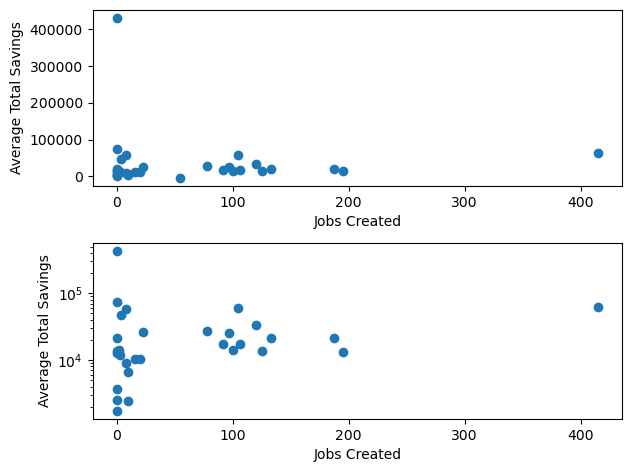

In [101]:
# reading in from the csv file
df_plot= pd.read_csv('NTA_jobs_savings.csv')

plt.figure()

# linear subplots

plt.subplot(211)
plt.scatter(df_plot['Job created' ], df_plot['mean total savings'])
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings')

# log subplot 

plt.subplot(212)
plt.scatter(df_plot['Job created' ], df_plot['mean total savings'])
plt.yscale('log')
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings')

plt.tight_layout(pad = 1.0)

### Matplotlib task 2:  Create a histogram of the log of the average total savings.

Text(0.5, 0, 'mean total savings')

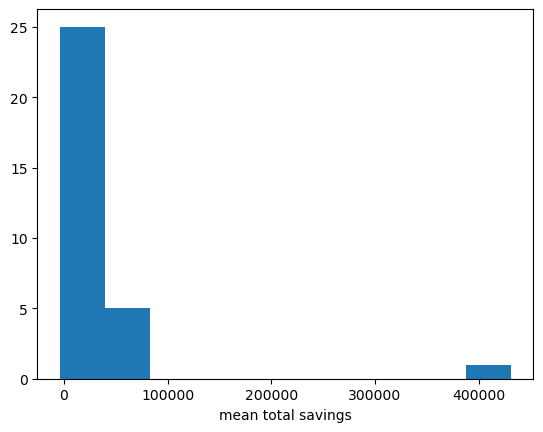

In [128]:
plt.hist(df_plot['mean total savings'])
plt.xlabel('mean total savings')

### Matplotlib task 3: Create a line plot of the total jobs created for each month.

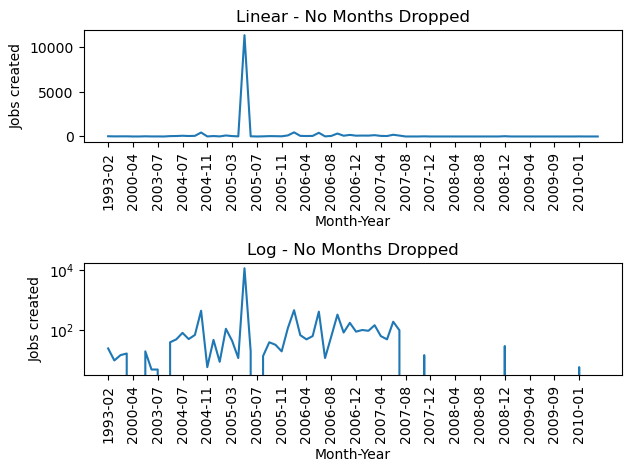

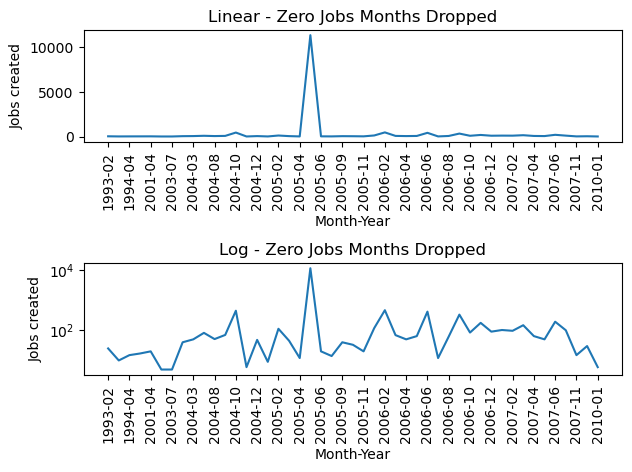

In [132]:
jobs_month = pd.read_csv('jobs_per_month.csv')

# Did this task in both linear and log as log was a little easier to see the smaller spikes and the linear showed the difference in the big spike


plt.subplot(211)
plt.plot(jobs_month['Month-Year'][:80],jobs_month['Job created'][:80] )

plt.title('Linear - No Months Dropped')
plt.xlabel('Month-Year')
plt.ylabel('Jobs created')
plt.xticks(jobs_month['Month-Year'][:80:4],  rotation='vertical')

plt.subplot(212)
plt.plot(jobs_month['Month-Year'][:80],jobs_month['Job created'][:80] )
plt.title('Log - No Months Dropped')
plt.xlabel('Month-Year')
plt.ylabel('Jobs created')
plt.yscale('log')
plt.xticks(jobs_month['Month-Year'][:80:4],  rotation='vertical')

plt.tight_layout(pad = 1.0)
plt.show()

#These plots are with the zero job months dropped
jobs_month_nonzero = jobs_month[jobs_month['Job created'] != 0]

plt.subplot(211)
plt.plot(jobs_month_nonzero['Month-Year'],jobs_month_nonzero['Job created'] )
plt.title('Linear - Zero Jobs Months Dropped')
plt.xlabel('Month-Year')
plt.ylabel('Jobs created')
plt.xticks(jobs_month_nonzero['Month-Year'][::2],  rotation='vertical')

plt.subplot(212)
plt.plot(jobs_month_nonzero['Month-Year'],jobs_month_nonzero['Job created'] )
plt.title('Log - Zero Jobs Months Dropped')
plt.xlabel('Month-Year')
plt.ylabel('Jobs created')
plt.yscale('log')
plt.xticks(jobs_month_nonzero['Month-Year'][::2],  rotation='vertical')


plt.tight_layout(pad = 1.0)

plt.show()